<a href="https://colab.research.google.com/github/Malikarbaaz/Online_Retail_Customer_Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
file_path = '/content/drive/MyDrive/Data & Resources/Online Retail.xlsx'

In [4]:
# Reading our Dataset
data = pd.read_excel(file_path)

In [5]:
# head gives the top 5 rows of the given dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# tail gives the bottom 5 rows of the given dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
#info() print the basic information of our DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# describe() gives the overall descriptive summary of the dataframe
data.describe().T       # transpose() convert the column to row and row to column.

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
#  Shape give the total number of rows and columns
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 541909 , Columns 8


## **Preprocessing the dataset**
####  **In real world the data has a lot of missing values and it is due to data corruption or fail to record the data. For that purpose it is very important to handle the missing values also many of machine learning algorithms does not support missing values, that's why we check missing values first.**

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64


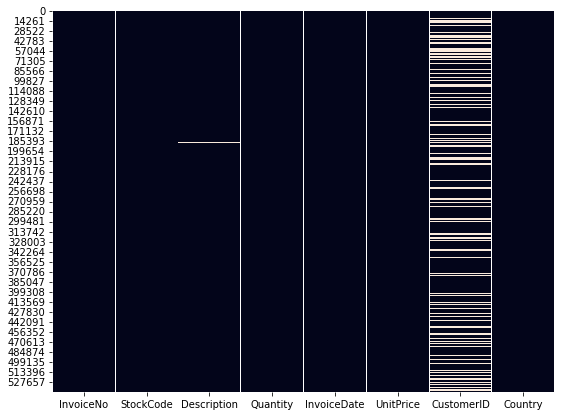

In [10]:
# lets check the total null values in our dataset.
# .sort_values sorting the dataset in ascending order and if you want to make it reverse just write False in bracket.
print(data.isna().sum().sort_values(ascending = False))

# Also plotting the null values on heatmap
plt.figure(figsize = (9,7))        # setting the size of graph  
sns.heatmap(data.isnull(), cbar = False)

### **With the help of heatmap we can clearly see there are some null values in features Description and CustomerID.**
*(Around 135080 null values in CustomerID and 1454 in Description.)*

In [11]:
# dropping all the missing values from our dataset 
data.dropna(inplace=True)

In [12]:
data.isna().sum().sort_values()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
# Checking the totol number of duplicate values 
print('Duplicate values in our dataset is:',len(data[data.duplicated()]))

Duplicate values in our dataset is: 5225


In [14]:
# Dropping the duplicate values from the dataset
data.drop_duplicates(inplace = True)

In [15]:
print('Rows {} , Columns {}'.format(data.shape[0], data.shape[1]))

Rows 401604 , Columns 8


### **After dropping null and duplicate values we see that 401604 rows and 8 columns are there in this dataset.** 

### **We have to drop some Invoice No which are starts with 'C' because 'C' indicates a cancellation** 

In [16]:
# Creating a copy of dataframe 
df = data.copy()

### **Here we creating a copy of dataframe because whatever we applying a conditions on new data so that it doesn't affect our original dataset.**

In [17]:
# First converting the column as string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [18]:
# Lets check the InviceNo that starts with 'C'
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
# We have to deal with those data of InvoiceNo which not containing 'C'
df = df[~df['InvoiceNo'].str.contains('C')]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [20]:
# Checking every column has similar rows by using count() function
df.count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
dtype: int64

In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

In [22]:
# Top 10 products name which were repeatedly sold
product_df = df['Description'].value_counts().reset_index()
product_df.rename(columns={'index': 'Description_Name','Description': 'Count'}, inplace=True)
product_df[:10]

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390
5,LUNCH BAG RED RETROSPOT,1303
6,SET OF 3 CAKE TINS PANTRY DESIGN,1152
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1078
9,PACK OF 72 RETROSPOT CAKE CASES,1050


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

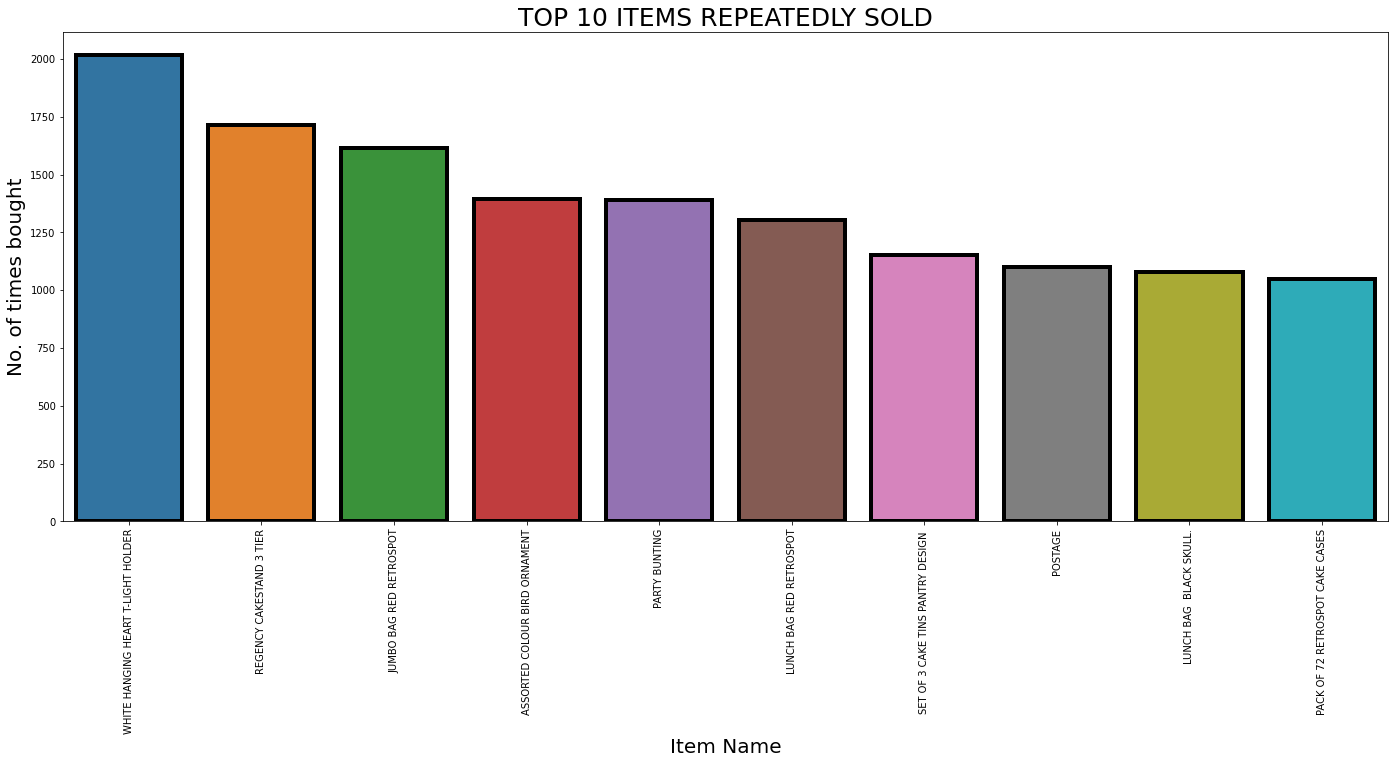

In [23]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize=(20,8))
sns.barplot(x='Description_Name',y='Count',data = product_df[:10], edgecolor = 'black',lw =4)
plt.xlabel('Item Name', SIZE = 20)
plt.ylabel('No. of times bought', SIZE = 20)
plt.title('TOP 10 ITEMS REPEATEDLY SOLD', SIZE = 25)
plt.tight_layout()
plt.xticks(rotation = 90)   # by using xticks we rotate our column labels to 90 degree.


###**Top product  based on maximum selling  are :**
    1.WHITE HANGING HEART T-LIGHT HOLDER,
    2.REGENCY CAKESTAND 3 TIER
    3.JUMBO BAG RED RETROSPOT
    4.ASSORTED COLOUR BIRD ORNAMENT
    5.PARTY BUNTING
    6.LUNCH BAG RED RETROSPOT
    7.SET OF 3 CAKE TINS PANTRY DESIGN
    8.POSTAGE
    9.LUNCH BAG BLACK SKULL
    10.PACK OF 72 RETROSPOT CAKE CASES

In [24]:
# Top 10 countries who's buying maximum products
Top_country = df['Country'].value_counts().reset_index()
Top_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_country[:10]

,Country_Name,Count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1453
9,Australia,1184


Text(0, 0.5, 'Count')

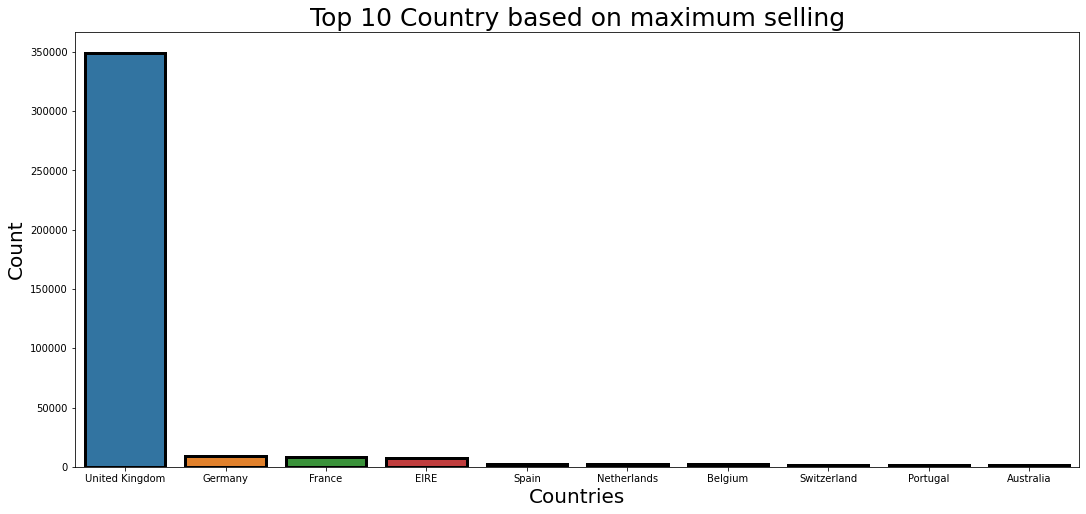

In [25]:
# Barplot of Top 10 countries who's buying maximum products
plt.figure(figsize=(18,8))
sns.barplot(x='Country_Name',y='Count',data=Top_country[:10], edgecolor = 'black',lw =3)
plt.title('Top 10 Country based on maximum selling', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)

###**From this graph we can see that most of the customers are from United Kingdom followed by Germany ,France ,EIRE and Spain, etc.**

### **Checking the distribution of numerical column to understand the data distribution is whether positively skwewd, negative skewed or symetric.**

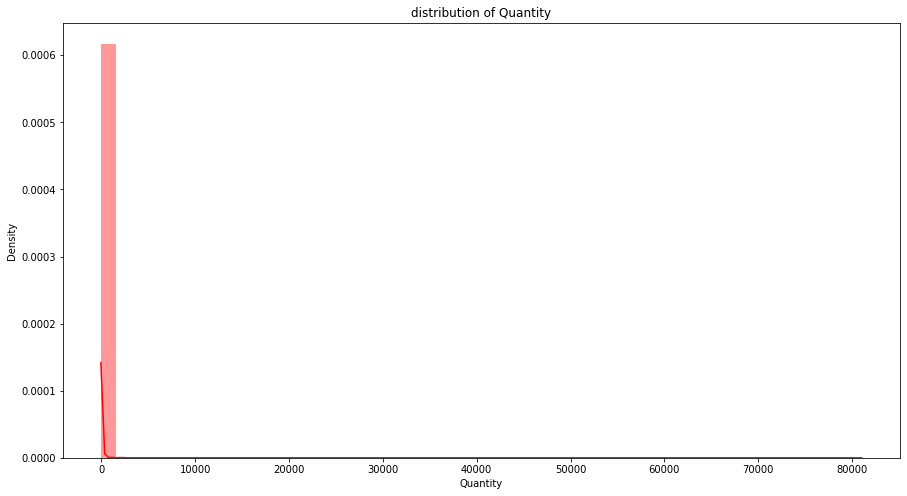

In [26]:
#distribution of Quantity
plt.figure(figsize=(15,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="R")

###**since we are not find anything from this type of graph so we use log transformation it basically shrink the data from large to small**

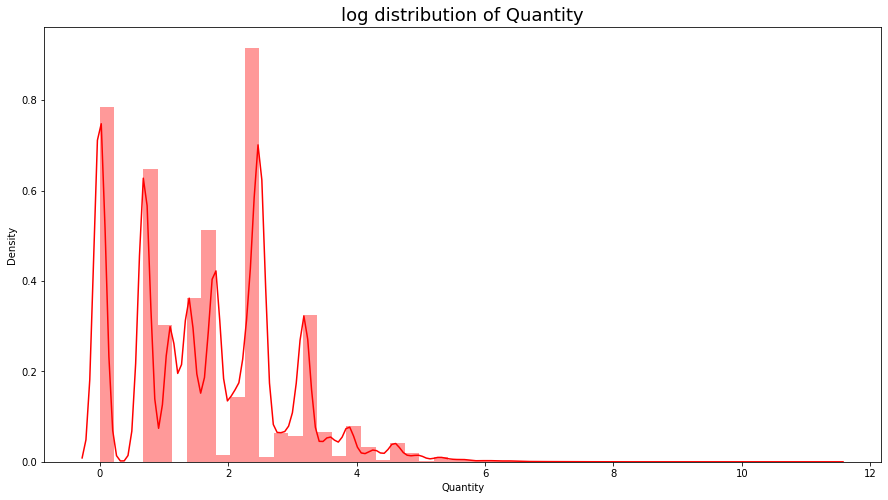

In [27]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(15,8))
plt.title('log distribution of Quantity', SIZE =18)
sns.distplot(np.log(df['Quantity']),color="R")

###**Now it is much better to understand the distibution of quantity column.......same we have to do with UnitPrice also**

### **Convert InvoiceDate columns into date time format**

In [28]:
df['Day'] = df['InvoiceDate'].dt.day_name()        # gives the name of the days like monday,tuesday,...
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

### **We are creating some new features from Invoicedate like hours,year,month_num,day_num**

In [29]:
# Create a new features TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Quantity']*df['UnitPrice']
df['Month']=df['InvoiceDate'].dt.month_name()  # Creating new feature Month which gives the month like january, february, etc.
df[:10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,25.50,December
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Wednesday,2010,12,1,8,28,11.10,December
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,Wednesday,2010,12,1,8,28,11.10,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,Wednesday,2010,12,1,8,34,54.08,December


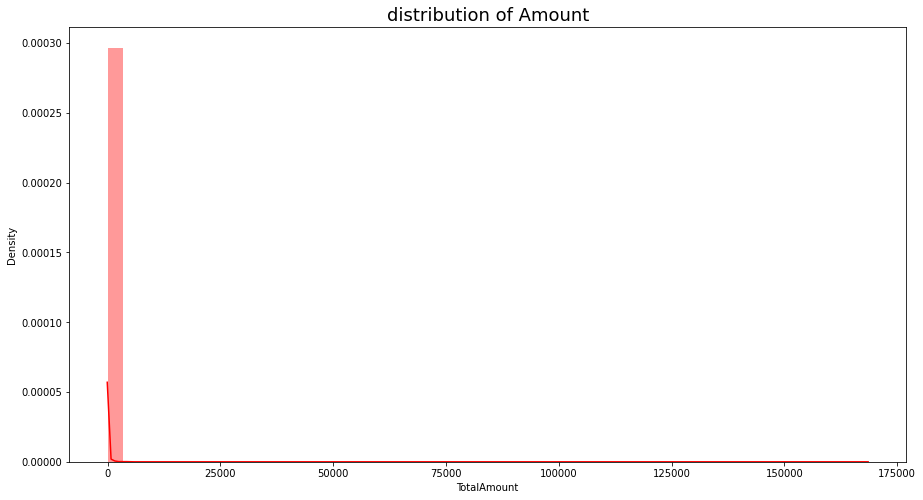

In [30]:
# distribution of TotalAmount 
plt.figure(figsize=(15,8))
plt.title('distribution of Amount', SIZE=18)
sns.distplot(df['TotalAmount'],color="R")

### **Again we are not finding anything from this type of graph so lets do Log Transformation**

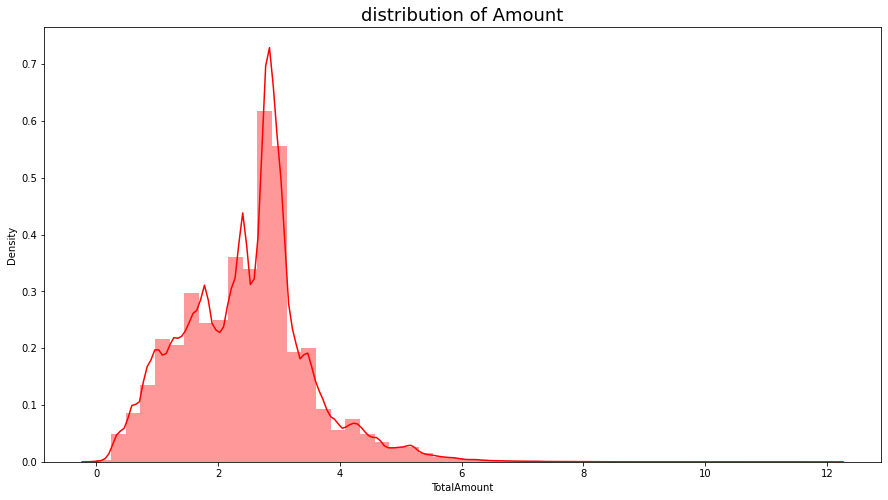

In [31]:
# log transform on distribution of TotalAmount 
plt.figure(figsize=(15,8))
plt.title('distribution of Amount', SIZE = 18)
sns.distplot(np.log1p(df['TotalAmount']),color="R")

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64


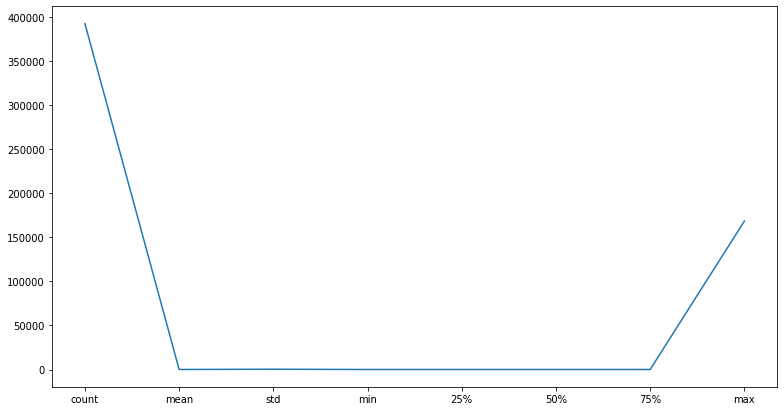

In [32]:
# Check the description of TotalAmount
print(df['TotalAmount'].describe())

# Plot the description of TotalAmount
plt.figure(figsize=(13,7))
df['TotalAmount'].describe().plot()

In [33]:
# on which day most of the order is placed 
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237
4,Sunday,61214
5,Friday,54231


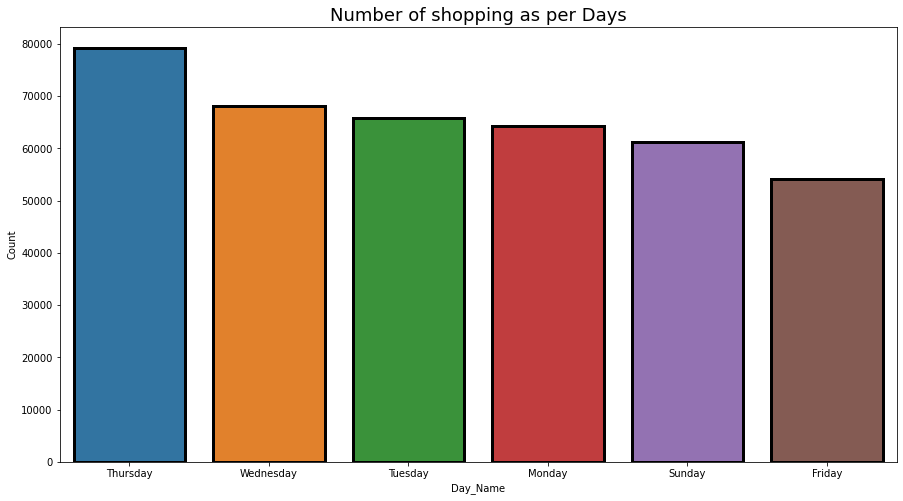

In [34]:
# Plot the number of shopping as per days
plt.figure(figsize=(15,8))
plt.title('Number of shopping as per Days', SIZE= 18)
sns.barplot(x= 'Day_Name', y='Count',data=day_df, edgecolor = 'black', lw=3)

###**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday and less on Friday as compared to these days**

### **From the month prospective which month is the highest selling**

In [35]:
# Monthly purchases
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name','Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075
5,June,26926
6,March,26872
7,August,26796
8,July,26582
9,April,22435


Text(0.5, 1.0, 'MONTHLY PURCHASES')

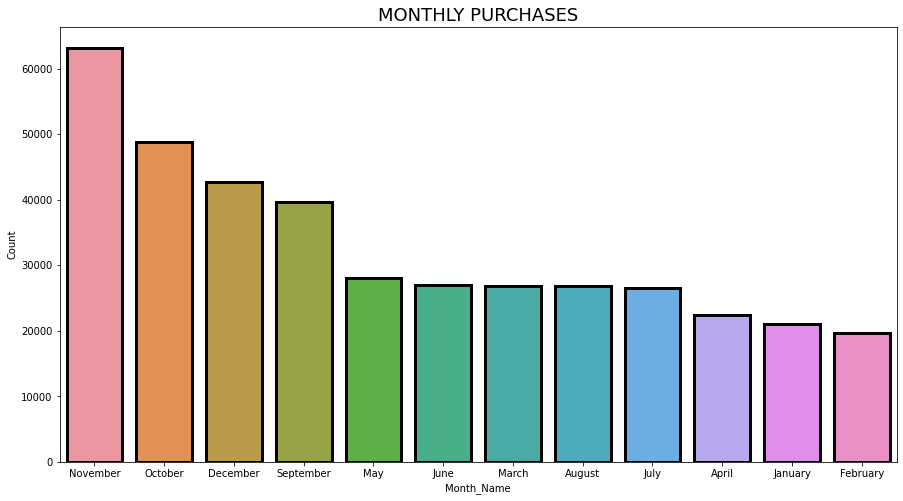

In [36]:
#same through visualization
plt.figure(figsize=(15,8))
sns.barplot(x='Month_Name',y='Count',data = month_df, edgecolor = 'black', lw=3)
plt.title('MONTHLY PURCHASES', SIZE = 18)

* ### **Most numbers of customers have purches the gifts in the month of November, October, December and September**

* ### **And less numbers of customers have purches the gifts in the month of April, january and February**

### **From hour prospective which hour is the highest selling**

In [37]:
# Purchasing hour wise
hour_df = df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name','hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


Text(0.5, 1.0, 'Hour')

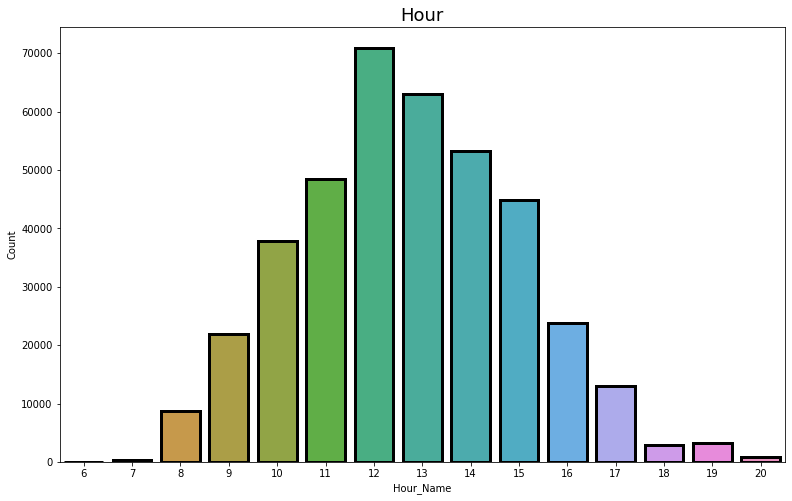

In [38]:
# Plotting hour wise purchasing
plt.figure(figsize=(13,8))
sns.barplot(x='Hour_Name',y='Count',data=hour_df, edgecolor = 'black', lw=3)
plt.title('Hour', SIZE= 18)


### **From this graph we can say that in Afternoon Time most of the customer purchases the item.**

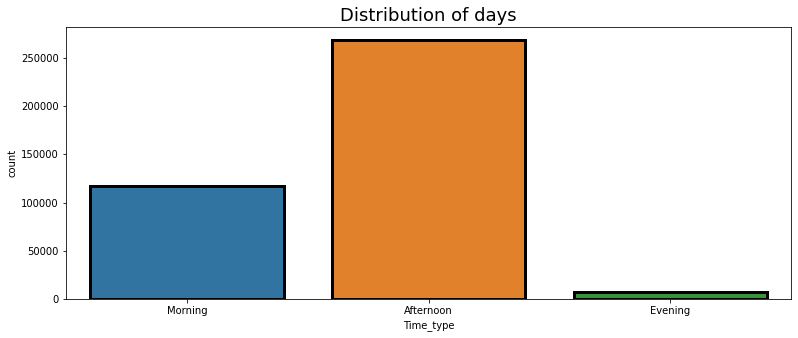

In [39]:
# distribution of days in Morining, Afternoon and Evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

df['Time_type']=df['hour'].apply(time_type)

#Plotting distribute of day in Morining, Afternoon and Evening
plt.figure(figsize=(13,5))
plt.title('Distribution of days', SIZE = 18)
sns.countplot(x='Time_type',data=df,  edgecolor = 'black', lw=3)

###**Most of the customers have purches the items in Afternoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

# **Create the RFM model (Recency, Frequency and Monetary value)**

#### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on**
#### **Performing RFM Segmentation and RFM Analysis, Step by Step**
*The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ...*

*The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.However, this approach doesnot require machine learning algorithms as segmentation can be done manually.*

* ### **Recency = Latest Date - Last Inovice Data**
* ### **Frequency = count of invoice no. of transaction(s)**
* ### **Monetary = Sum of Total Amount for each customer**

In [40]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


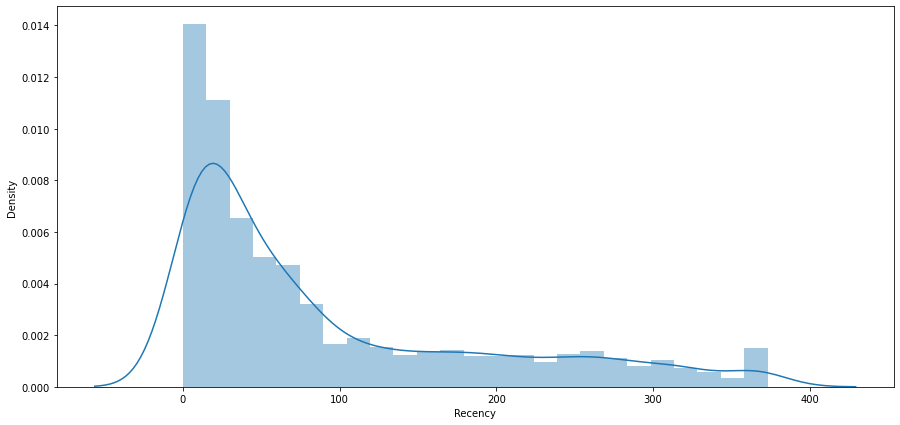

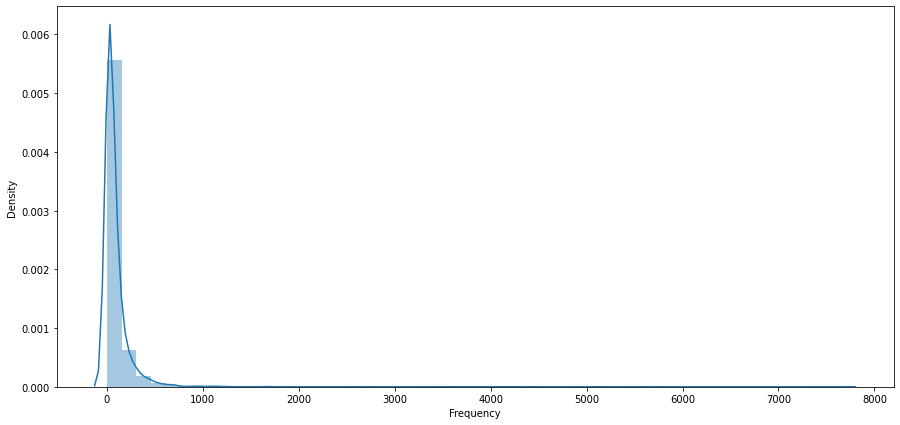

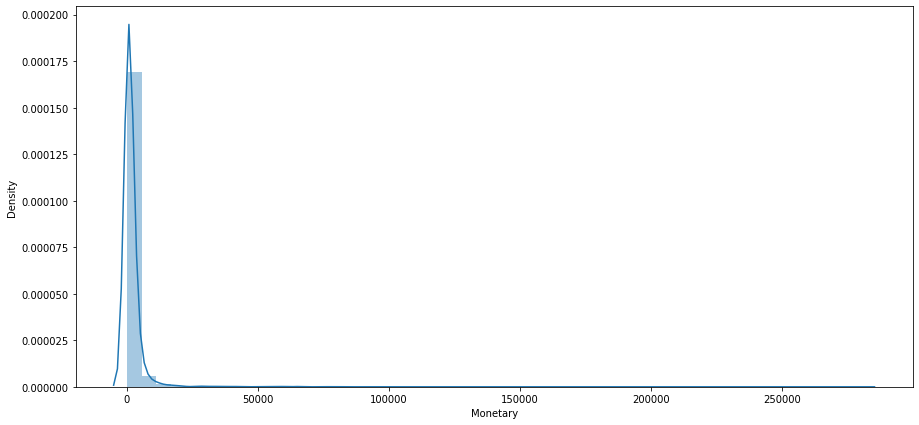

In [41]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(15,7))
sns.distplot(x)

#Frequency distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(x)

#Monetary distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(15,7))
sns.distplot(x)

### **All distplots are right skewed data or positively skewed**
### **From recency its says that there is a huge set of customer who comes very frequently to purchase**

In [42]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

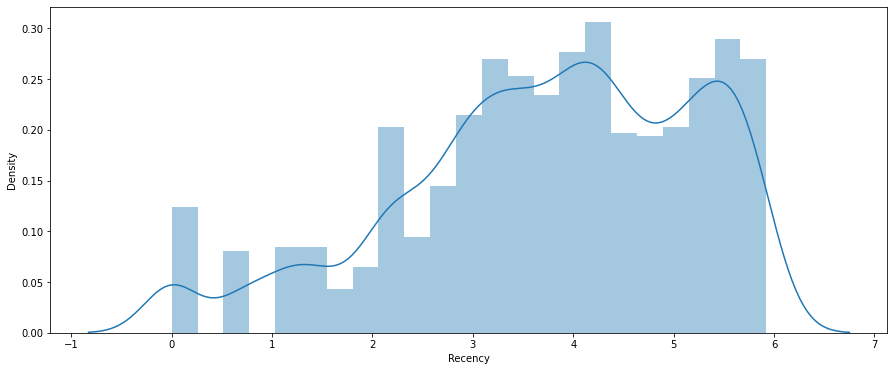

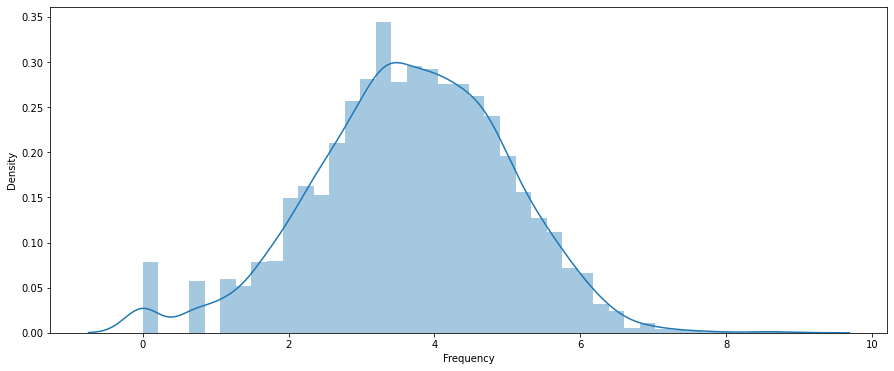

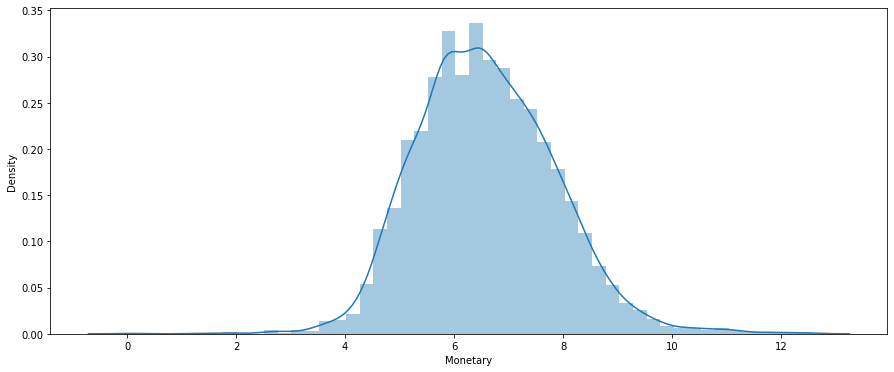

In [43]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(15,6))
sns.distplot(Recency_Plot)

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(15,6))
sns.distplot(Frequency_Plot)

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(15,6))
sns.distplot(Monetary_Plot)

### **Split into four segments using quantiles**

In [44]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles 

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

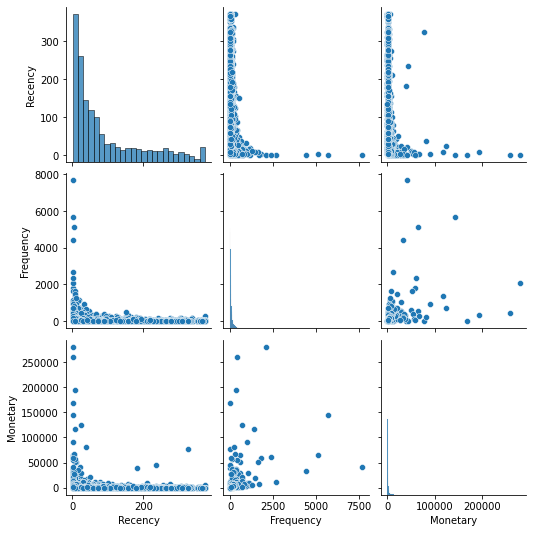

In [45]:
# Graphical representation of the relation between recency, frequency and monetary
sns.pairplot(rfm_df)

In [46]:
#Functions to create R, F and M segments
def RScoring(x,p,d):                      # everyday to come to store the best is the customer ,here 1 is best and 4 is worst
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):                    # the higher the product purchasing is the best customer, here 4 is worst and 1 is best
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [47]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [48]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [49]:
rfm_df.RFMScore.describe()

count    4339.000000
mean        7.506338
std         2.814398
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

### **all are good max value is also good**

In [50]:
print(rfm_df[rfm_df.RFMScore <= 5].shape, '\n' )     #In RFMScore any value is less than 5 is my best set of customer
rfm_df.RFMScore.value_counts()

(1261, 8) 



10    519
9     461
7     459
8     457
3     443
5     428
6     410
11    391
4     390
12    381
Name: RFMScore, dtype: int64

### **this 1261 customer is very good for the market**

### **Outliers Detection using boxplot**
* **We use boxplot to understand how many outliers are there in our data and we see that there are lots of outliers.****

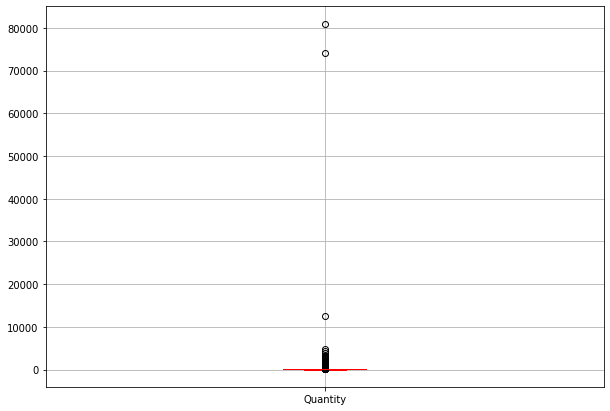

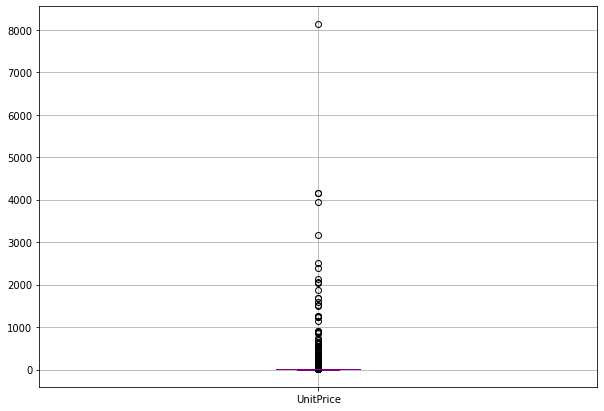

In [51]:
# plotting for Quantity variable
fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
df.boxplot(column = ['Quantity'], color="red", ax = ax)
plt.show()


# plot for UnitPrice variable
fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
df.boxplot(column = ['UnitPrice'], color="purple", ax = ax)
plt.show()

### **Removing the outliers**
* **In order to drop the outliers here we using IQR to finding out how many outliers are there to drop them.**

In [52]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [53]:
# Removing the outliers using the function created
df = remove_outliers(df = df, column = 'Quantity')
df = remove_outliers(df = df, column = 'UnitPrice')

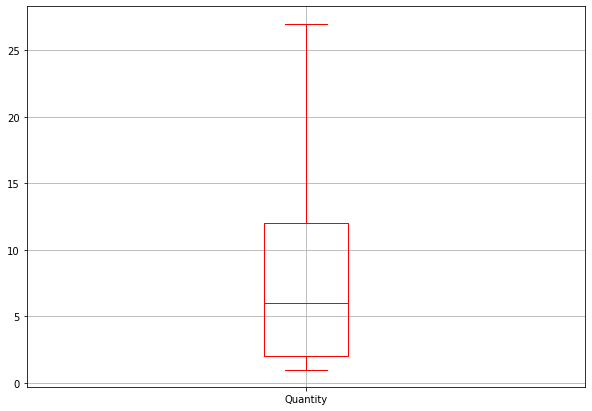

In [54]:
# After removing outliers
fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
df.boxplot(column = ['Quantity'], color="red", ax = ax)
plt.show()


Text(0.5, 1.0, 'CORRELTAION MATRIX')

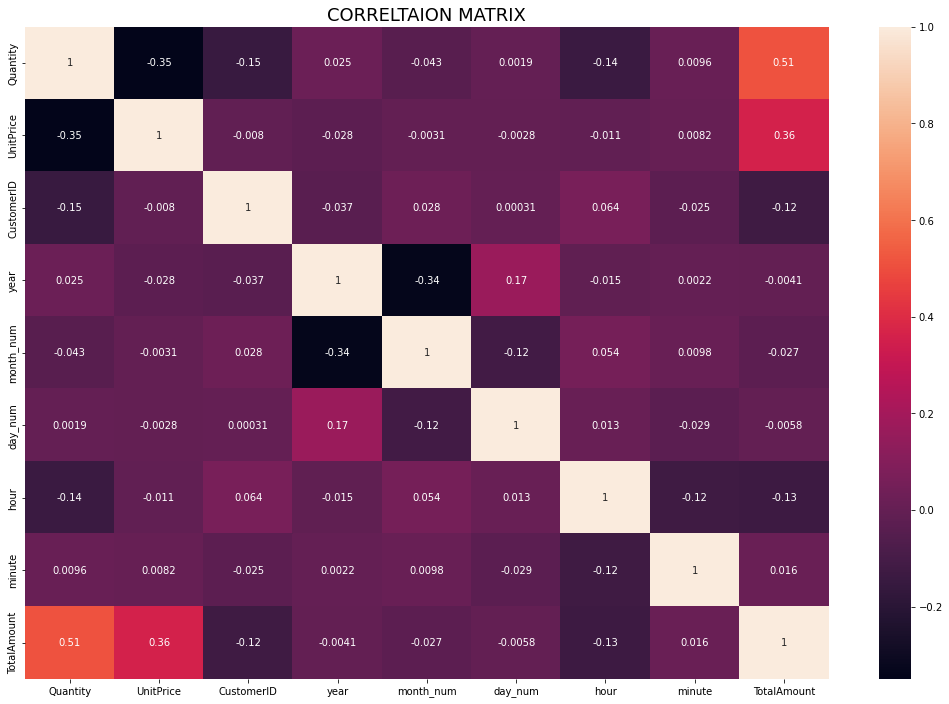

In [55]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True)
plt.title('CORRELTAION MATRIX', SIZE =18)

# **MODELLING**

#### **K-MEANS CLUSTERING**



In [72]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [73]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804
For n_clusters = 11 The average silhouette_score is : 0.26053571388536995
For n_clusters = 12 The average silhouette_score is : 0.2658660395456048
For n_clusters = 13 The average silhouette_score is : 0.2633746937000211
For n_clusters = 14 The average silhouette_score is : 0.25492771945211434
For n_clusters = 15 The average silhouette_score is : 

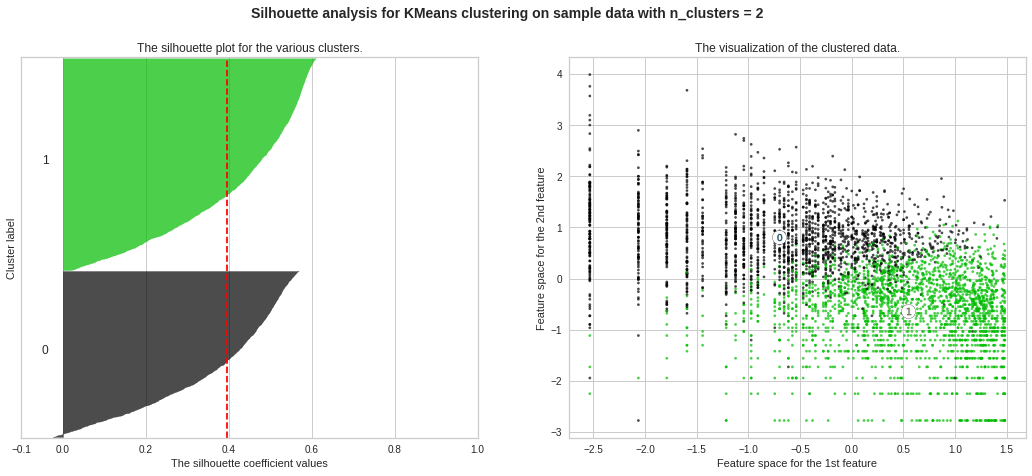

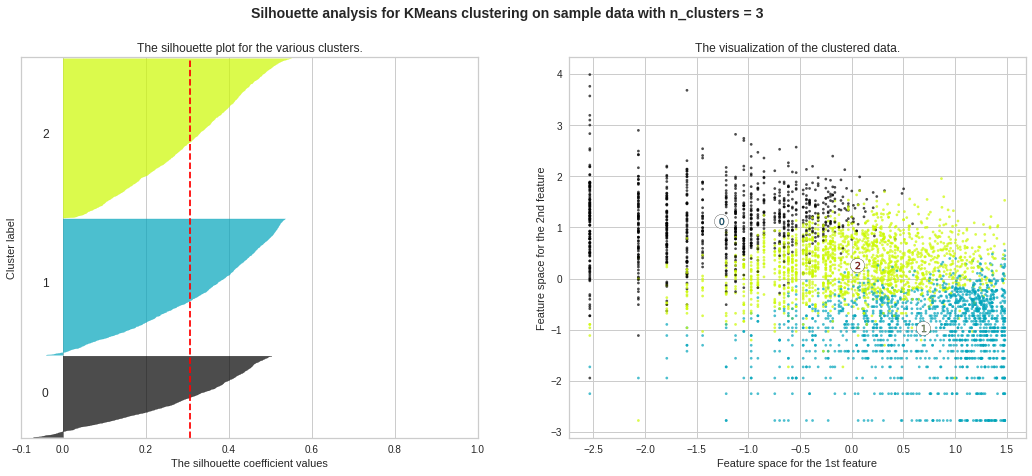

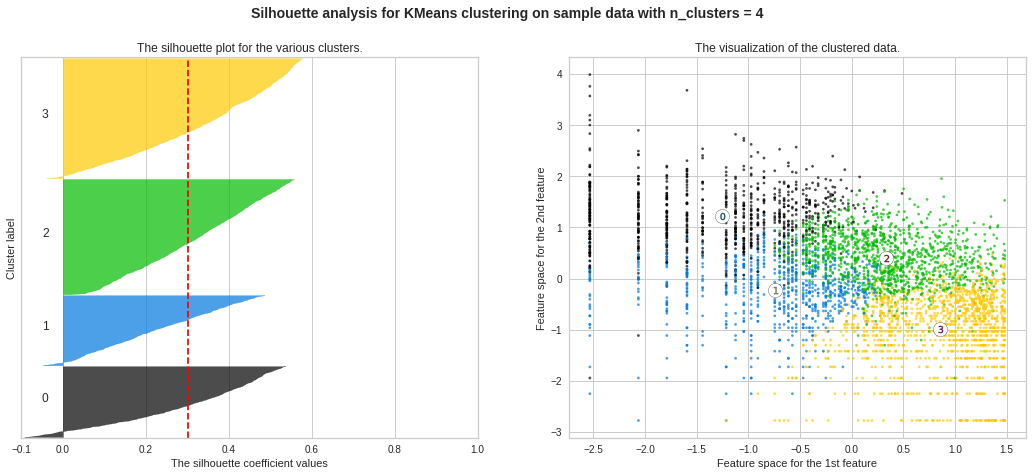

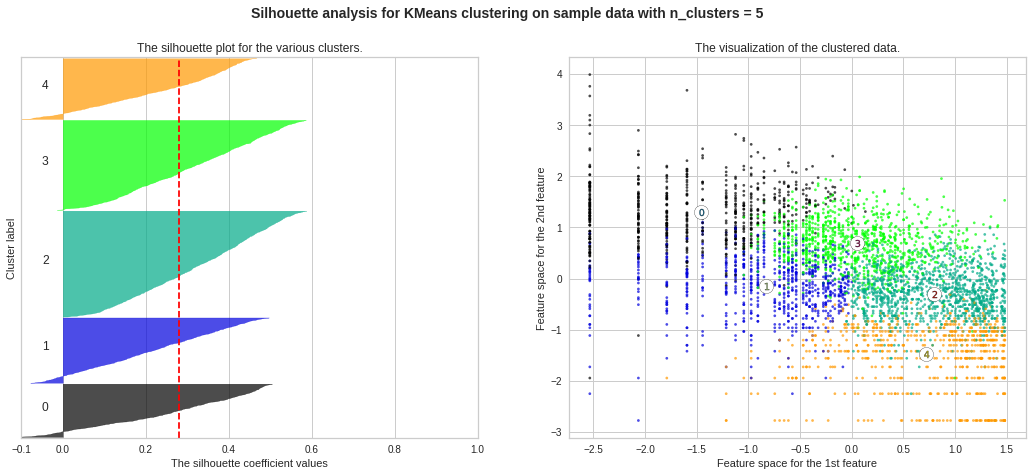

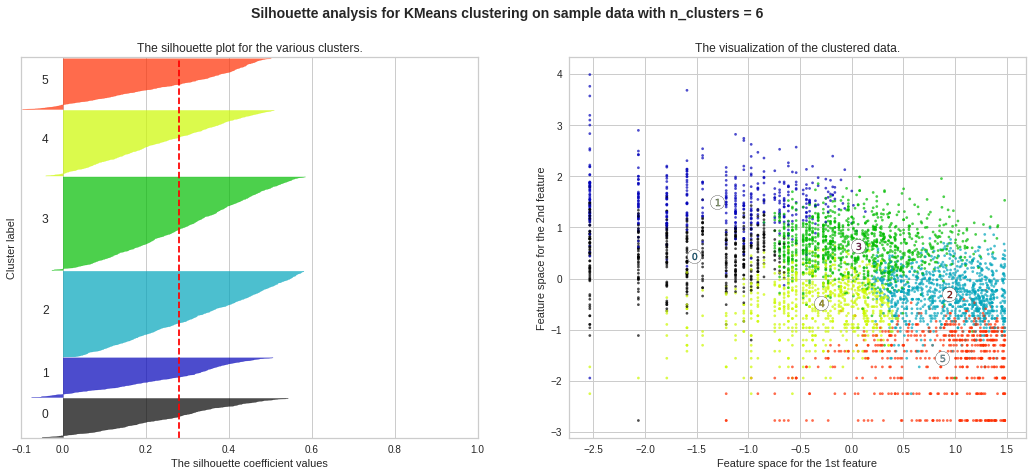

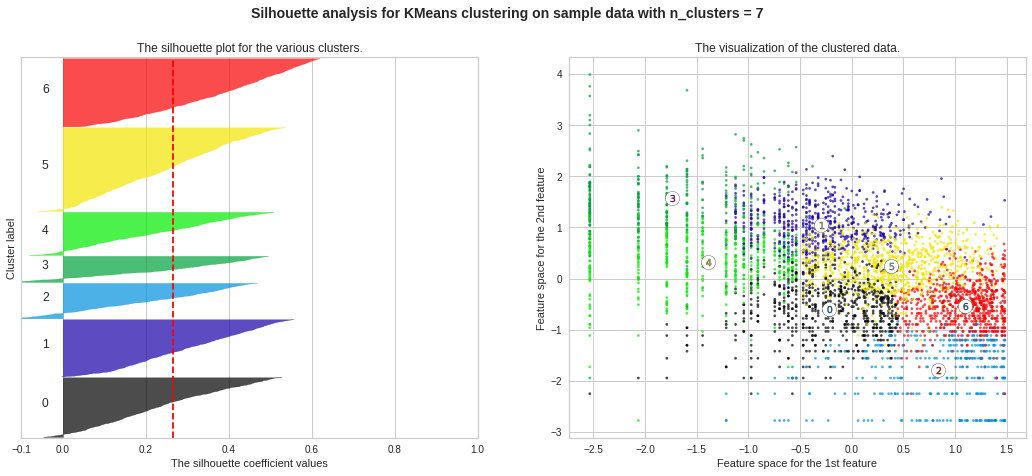

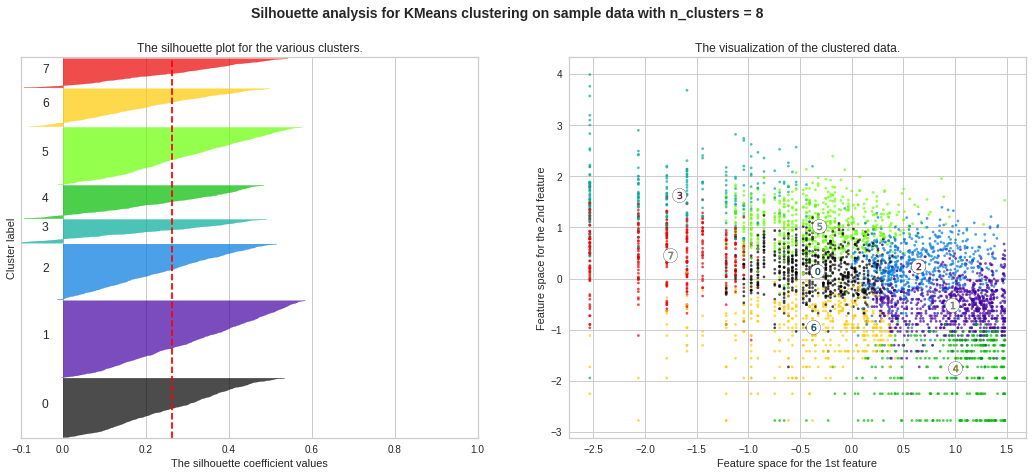

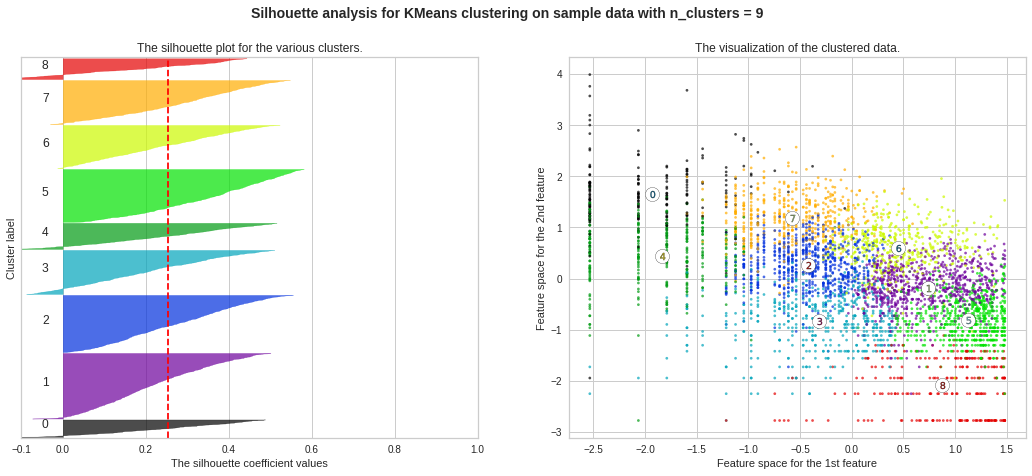

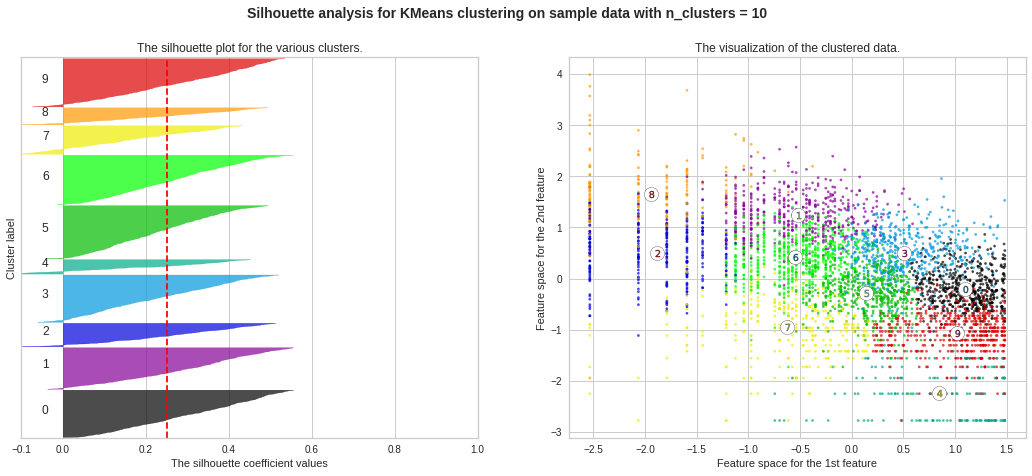

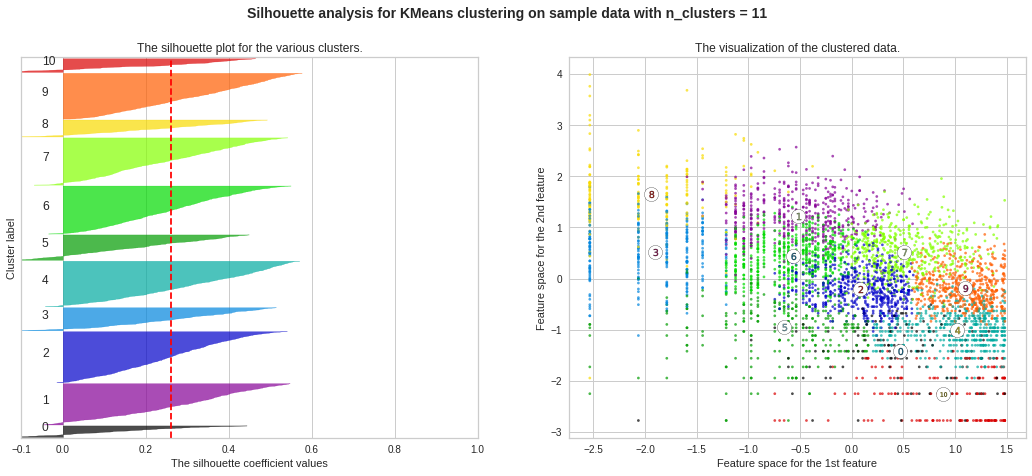

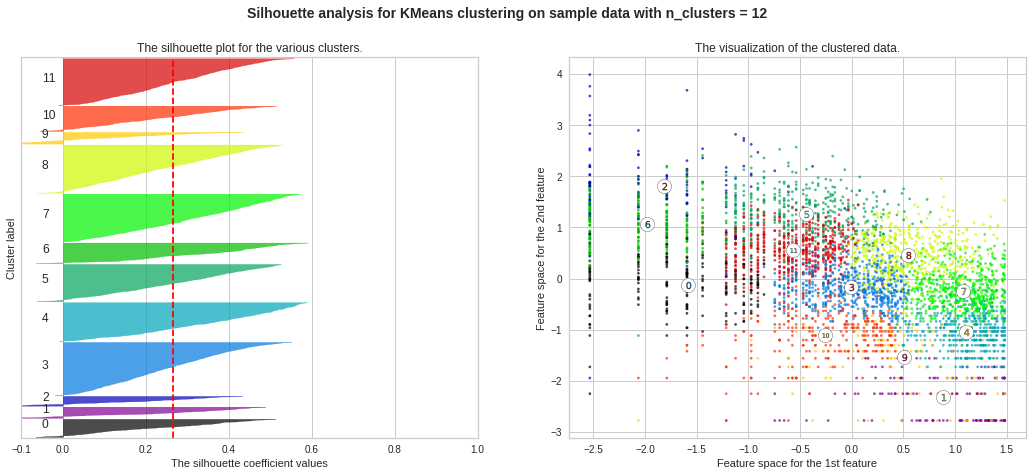

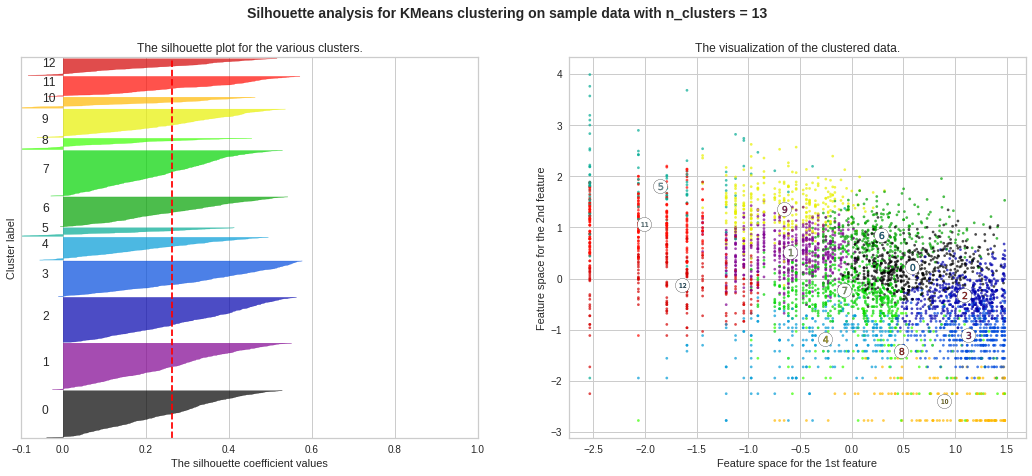

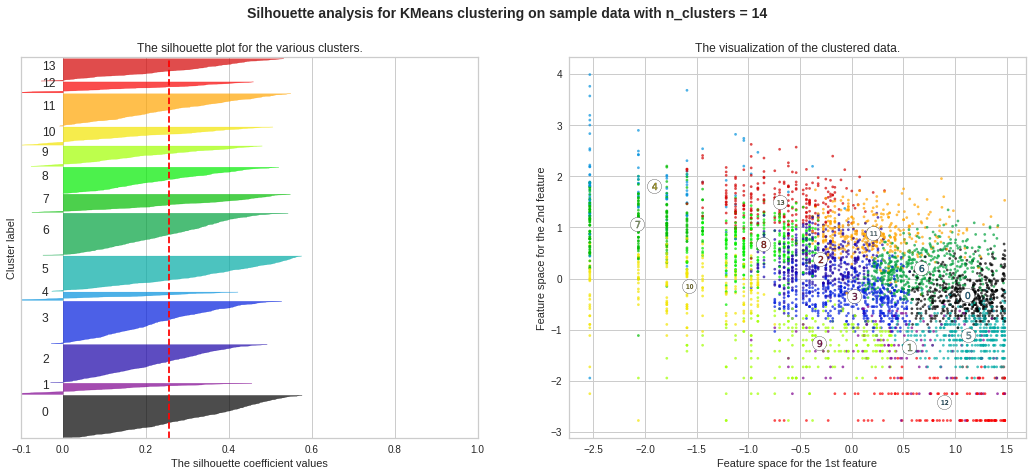

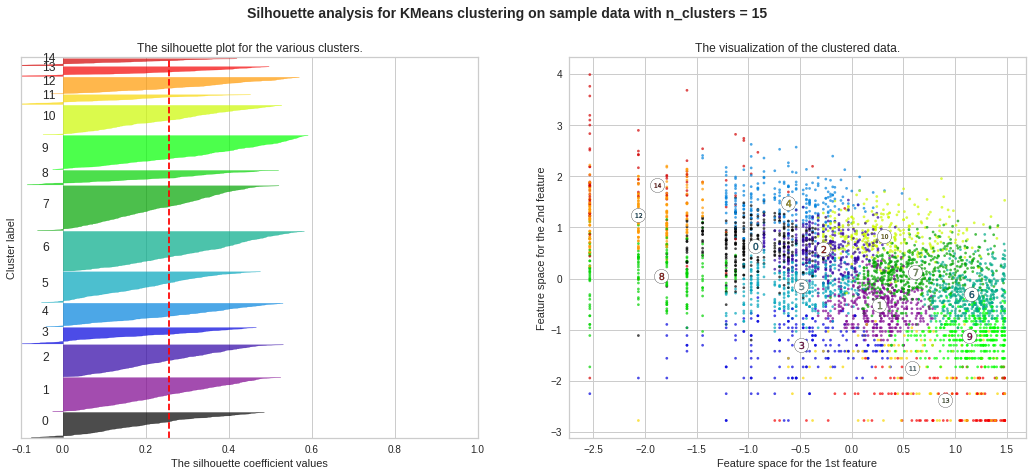

In [74]:
from sklearn.metrics import silhouette_score                    #the silhouette code you will get from the google
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()